In [1]:
import glob
import os
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import inflect
import csv
import pandas as pd
import statistics
p = inflect.engine()

from utils.utils import run_k_fold, train_score

In [2]:
matched_tages_with_score = pd.read_csv("matched_tages_with_score.csv", dtype=str)

In [3]:
# def clean_google_categories(categories):
#     categories = str(categories).lower()
#     categories = categories.replace("take away", "takeout")
#     categories = categories.replace("takeaway", "takeout")
#     categories = categories.replace("&", ",")
#     categories = categories.replace(" and ", ",")
#     categories = categories.split(",")
#     final_categories = set()
#     for c in categories:
#         if c != "" and c != "nan":
#             final_categories.add(clean_single_category(c))
#     return ",".join(list(final_categories))

# def clean_single_category(category):
#     category = category.strip().lower()
#     category = category.replace("-", " ")
#     category = category.replace("/", " ")
#     # replace multiple white spaces with single white space
#     category = " ".join(category.split())  # replace multiple white spaces with single white space

#     # convert plural forms to singular
#     category = p.singular_noun(category) or category

#     # words to remove
#     remove_list = ['restaurant', 'shop', 'store']
#     category_list =category.split()
#     if len(category_list) > 1:
#         category = ' '.join([c for c in category_list if c not in remove_list])
#         category = category.replace('barbecue', 'bbq')
#         category = category.replace('hamburger', 'burger')
#     return category


# # function that checks if two category strings contain the same words
# def same_categories(categories_old, categories_new):
#     """Checks if two category strings contain the same words"""
#     words_old = set([clean_google_categories(c) for c in categories_old.split(",") if c != ""])
#     words_new = set([clean_google_categories(c) for c in categories_new.split(",") if c != ""])

#     # Check if the sets of words are equal
#     # print("words_old:", words_old, "words_new:", words_new, words_old == words_new)
#     return words_old == words_new

# def train_score(train:pd.DataFrame, column_to_train_on:str) -> dict:
#     google_train_columns = {}
#     for index, row in train.iterrows():
#         google_categories_list = str(row[column_to_train_on]).split(',')
#         for category in google_categories_list:
#             if category in google_train_columns:
#                 google_train_columns[category].append(float(row['average_health_score']))
#             else:
#                 google_train_columns[category] = [float(row['average_health_score'])]

#     google_categories_score = {}
#     for k, v in google_train_columns.items():
#         # print(k, v)
#         if len(v) > 0:
#             try:
#                 google_categories_score[k] = (sum(v) / len(v), statistics.stdev(v))
#             except statistics.StatisticsError:
#                 google_categories_score[k] = (sum(v) / len(v), 0)

#     return google_categories_score, google_train_columns

# def test_score(test:pd.DataFrame, google_categories_score:dict, column_to_train_on:str):

#     total_diff = []
#     # iterate through each row in test data frame
#     for index, row in test.iterrows():
#         categories = str(row[column_to_train_on]).split(',')
#         try:
#             score = calculate_score(google_categories_score, categories)
#             diff = (float(row['average_health_score']), score)
#             total_diff.append(diff)
#         except ZeroDivisionError:
#             pass
#     return total_diff

# def calculate_score(google_categories_score, categories) -> float:
#     score_with_stdev = sum([google_categories_score[category][0] * (1/google_categories_score[category][1]) for category in categories if category in google_categories_score])/sum([(1/google_categories_score[category][1]) for category in categories if category in google_categories_score])
#     score_with_stdev = sum([google_categories_score[category][0] * (1/google_categories_score[category][1]**4) for category in categories if category in google_categories_score])/sum([(1/google_categories_score[category][1]**4) for category in categories if category in google_categories_score])
#     score_just_avg = sum([google_categories_score[category][0] for category in categories if category in google_categories_score])/sum([1 for category in categories if category in google_categories_score])

#     return score_with_stdev
#     return score_just_avg

# def run(matched_tages_with_score, column_to_train_on:str):
#     k_folds = 10
#     kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
#     print("==========================================================================")
#     print(column_to_train_on)
#     i = 0
#     for train_index, test_index in kf.split(matched_tages_with_score):
#         train, test = matched_tages_with_score.iloc[train_index], matched_tages_with_score.iloc[test_index]
#         google_categories_score, google_train_columns = train_score(train, column_to_train_on)
#         # save google_categories_score to a text file
#         # with open(f'google_categories_score{i}.csv', 'w') as f:
#         #     for k, v in google_categories_score.items():
#         #         f.write(f"{k},{v}\n")
#         total_diff = test_score(test, google_categories_score, "google_categories")
#         diff = [abs(diff[0] - diff[1]) for diff in total_diff]
#         average_diff = sum(diff) / len(total_diff)
#         diff_stdv = pd.Series(diff).std()

#         print(f"Average difference: {average_diff}; Standard deviation: {diff_stdv}; Number of outlets: {len(total_diff)}; Total difference: {sum(diff)}")
#         i += 1
#         # plot_scores(total_diff)


# def plot_scores(total_diff):

#     # Extract real scores and estimate scores from total_diff
#     real_scores = [diff[0] for diff in total_diff]
#     estimate_scores = [diff[1] for diff in total_diff]

#     # Set the figure size
#     fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the width and height as desired
#     # Plot the scatter plot
#     ax.scatter(real_scores, estimate_scores, s=2, alpha=0.5)
    
#     m, b = np.polyfit(estimate_scores, real_scores, 1)  # Compute the slope and intercept of the best fit line
#     estimate_scores_line = np.linspace(min(estimate_scores), max(estimate_scores), 100)
#     real_scores_line = m * estimate_scores_line + b
#     ax.plot(estimate_scores_line, real_scores_line, color='blue', linestyle='--')
#     ax.plot([-8, 5], [-8, 5], color='red', linestyle='-')

#     ax.set_ylabel("Estimate Scores")
#     ax.set_xlabel("Real Scores")
#     ax.set_title("Estimate Scores vs Real Scores")

#     plt.tight_layout()
#     plt.show()

In [4]:

google_categories_score, google_train_columns = train_score(matched_tages_with_score, column_to_train_on="google_tags")
sorted_dict = dict(sorted(google_train_columns.items(), key=lambda x: len(x[1]), reverse=False))

for k, v in sorted_dict.items():
    print(k, len(v))

intestine 1
banh beo 1
saj 1
prawn pancake 1
bulgogi stew 1
soy garlic 1
asian supermarket 1
duck noodle soup 1
barman 1
pepper rice 1
iron 1
carnivore 1
hotstar 1
chocolate mousse 1
pear 1
yorkie 1
smoker 1
security guard 1
osso bucco 1
cordial 1
icon 1
apple strudel 1
deep fried camembert 1
chasseur 1
bavarian 1
house wine 1
insult 1
harp 1
iraqi bread 1
creme brûlée pancake 1
chicken noodle 1
lao sausage 1
medium rare steak 1
bangladeshi food 1
noodle burger 1
peppery 1
indian vegetarian 1
makki di roti 1
ma sha allah 1
knafe 1
homer simpson 1
apple fritter 1
cinnamon scroll 1
glaze 1
yumcha 1
hot water 1
bakar 1
margherita pizza 1
sky 1
oxtail 1
persian 1
bottle of water 1
korean mexican fusion 1
bulgogi taco 1
coronarita 1
shot 1
ferris wheel 1
stealing 1
chicken penne 1
daal makhani 1
daal baati 1
poha 1
churma 1
ghewar 1
gujarati 1
provolone 1
swedish meatball 1
herring 1
semla 1
swedish food 1
rye bread 1
toast skagen 1
pirate 1
ship 1
meat alternative 1
pepita 1
middle eastern

google_categories
Average difference: 0.9318182793528332; Standard deviation: 0.832313388567358; Number of outlets: 1008; Total difference: 939.2728255876559


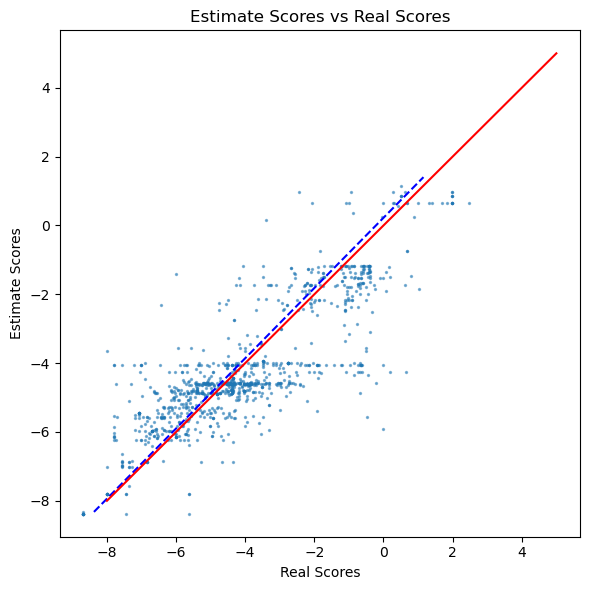

Average difference: 0.9514476781607879; Standard deviation: 0.8798050514609259; Number of outlets: 1007; Total difference: 958.1078119079134


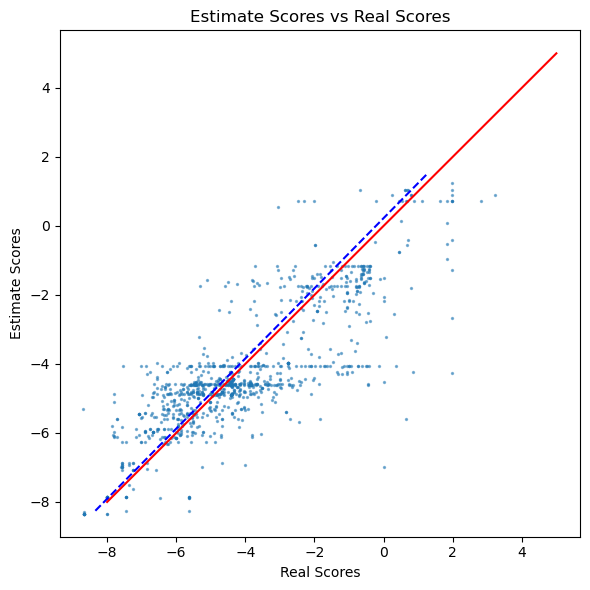

Average difference: 0.9914462835191918; Standard deviation: 0.8570393495885812; Number of outlets: 1008; Total difference: 999.3778537873454


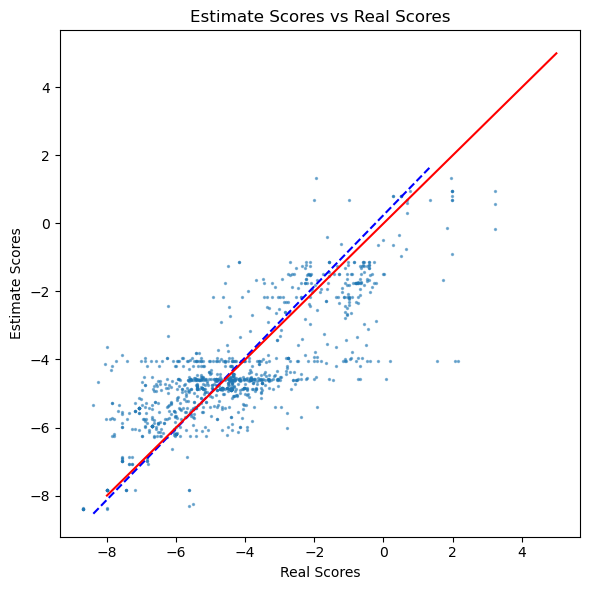

Average difference: 1.0197330990159907; Standard deviation: 0.8799591063838766; Number of outlets: 1010; Total difference: 1029.9304300061506


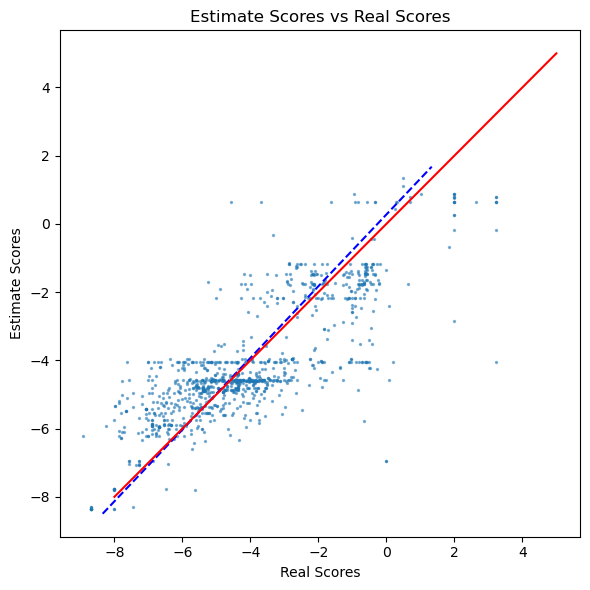

Average difference: 1.0145478752835198; Standard deviation: 0.8905029199994176; Number of outlets: 1012; Total difference: 1026.722449786922


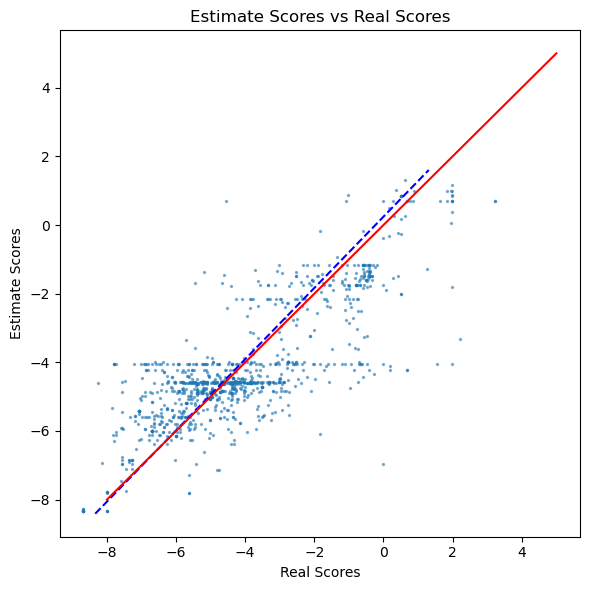

Average difference: 1.019744135867961; Standard deviation: 0.9102248104613109; Number of outlets: 1002; Total difference: 1021.783624139697


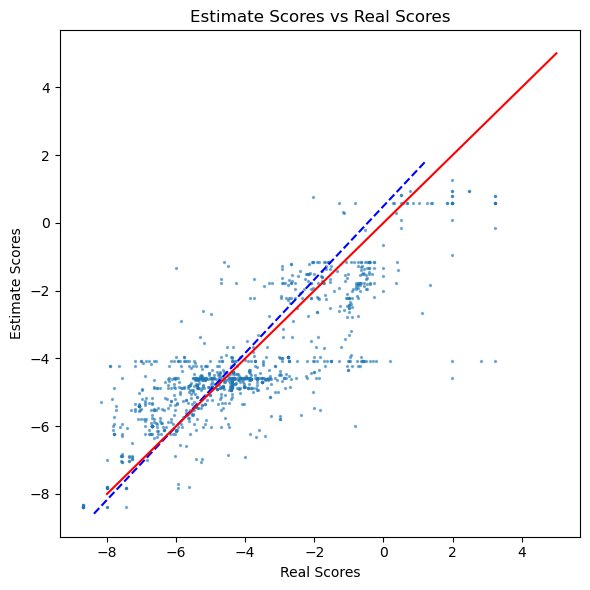

Average difference: 0.996487820666691; Standard deviation: 0.8840866178072099; Number of outlets: 1008; Total difference: 1004.4597232320244


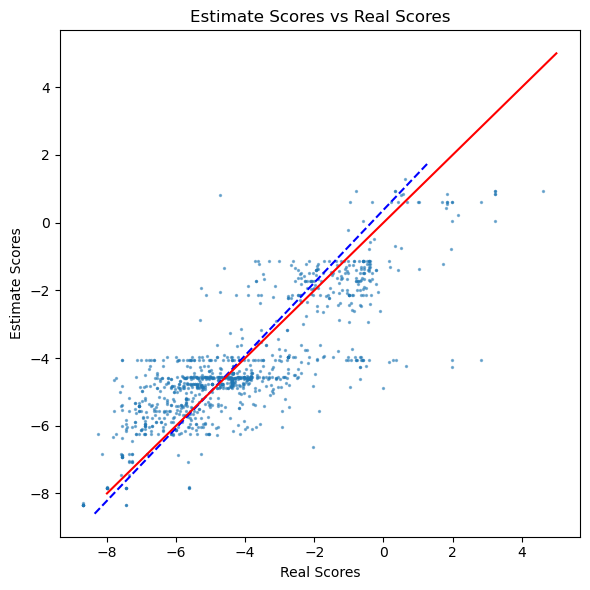

Average difference: 0.9765079296706376; Standard deviation: 0.8457910164761245; Number of outlets: 1003; Total difference: 979.4374534596495


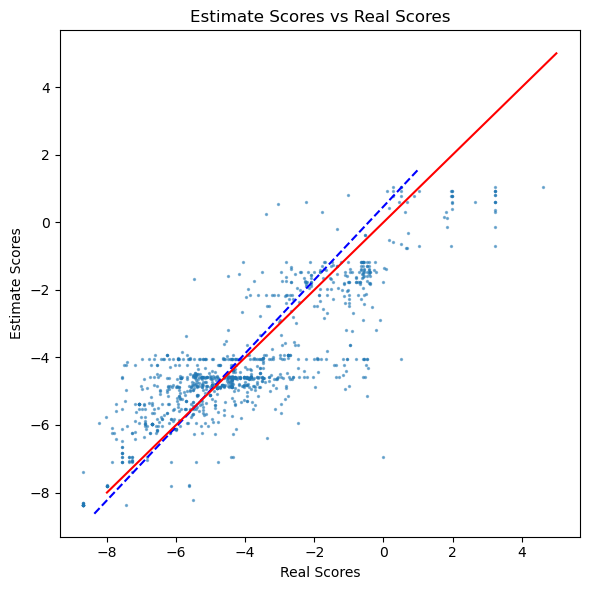

Average difference: 0.9938654905263102; Standard deviation: 0.8387291897024285; Number of outlets: 1003; Total difference: 996.8470869978892


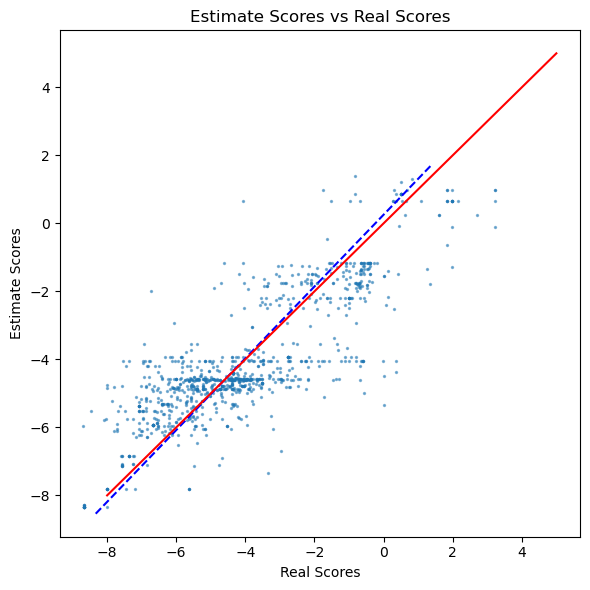

Average difference: 0.9611225398111829; Standard deviation: 0.815885936840195; Number of outlets: 1008; Total difference: 968.8115201296723


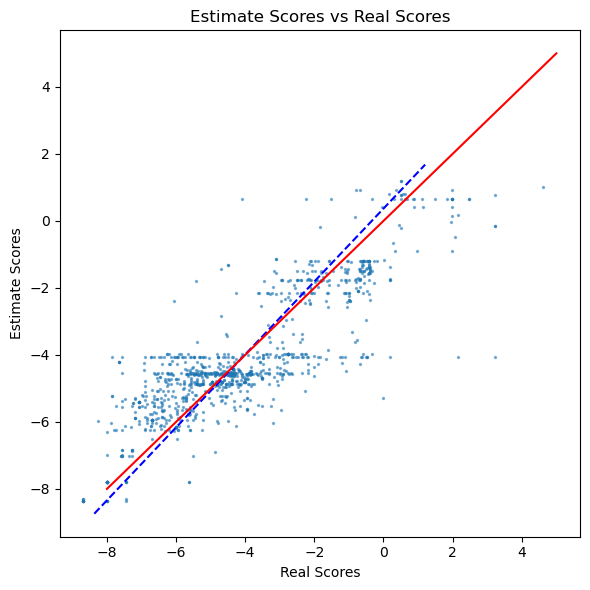

google_tags
Average difference: 1.2736368346877698; Standard deviation: 0.9985672898282484; Number of outlets: 952; Total difference: 1212.502266622757


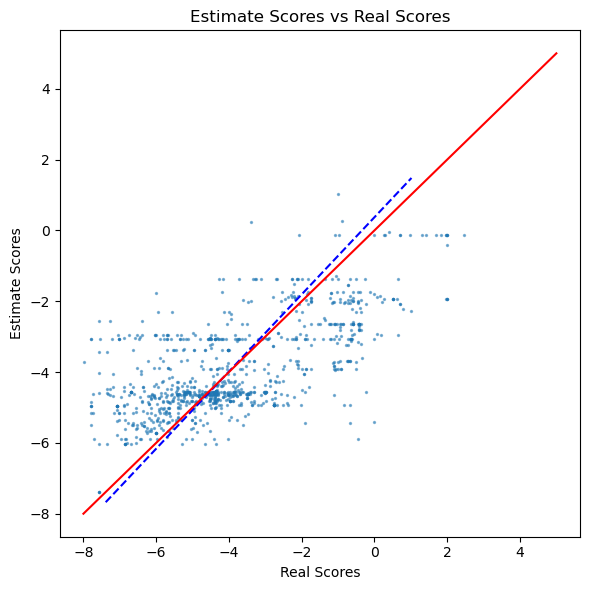

Average difference: 1.275148064618348; Standard deviation: 1.033871506631296; Number of outlets: 932; Total difference: 1188.4379962243004


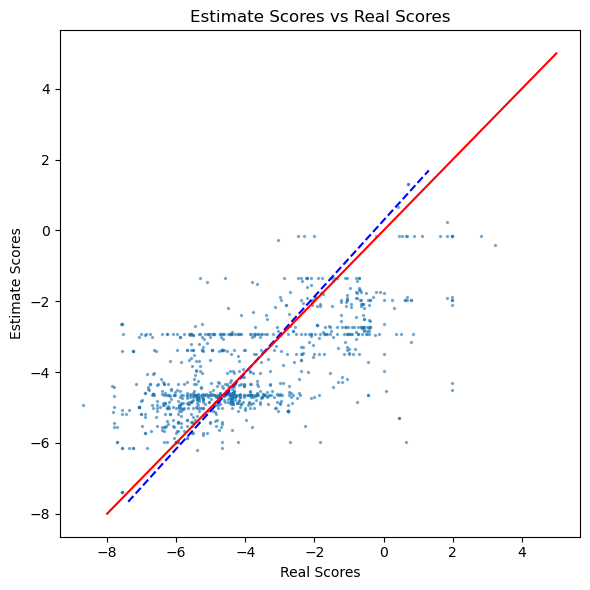

Average difference: 1.3077730934957765; Standard deviation: 1.0325986758193304; Number of outlets: 944; Total difference: 1234.537800260013


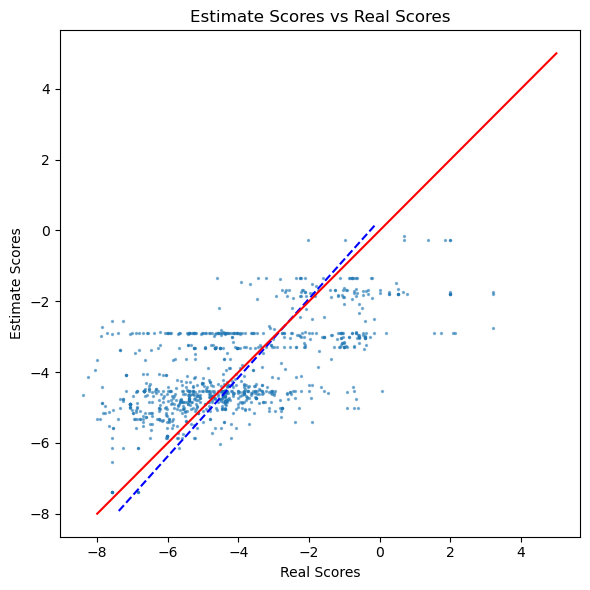

Average difference: 1.3214062185904571; Standard deviation: 1.0130318105558418; Number of outlets: 948; Total difference: 1252.6930952237533


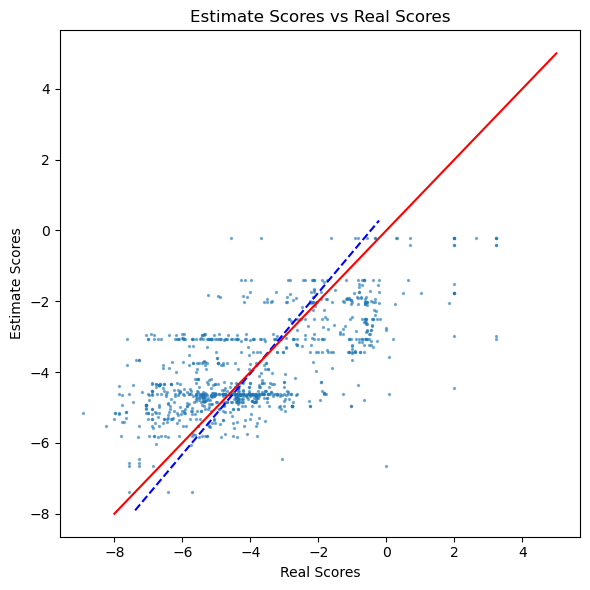

Average difference: 1.3373748249453985; Standard deviation: 1.049180583644089; Number of outlets: 956; Total difference: 1278.530332647801


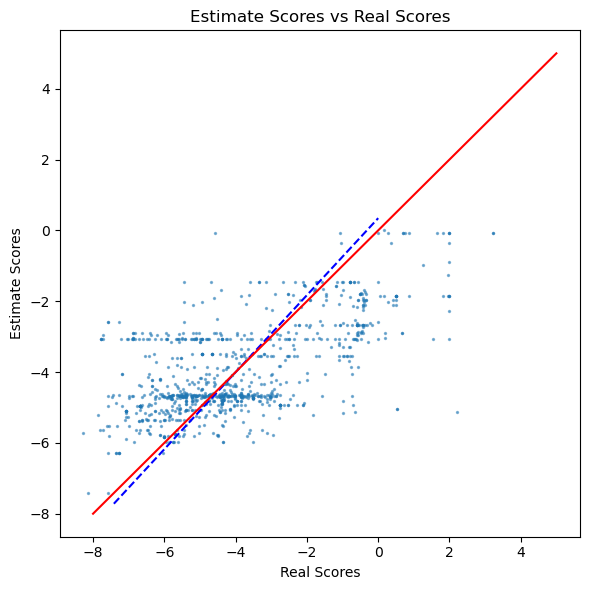

Average difference: 1.3583712118857176; Standard deviation: 1.0626233854114648; Number of outlets: 899; Total difference: 1221.17571948526


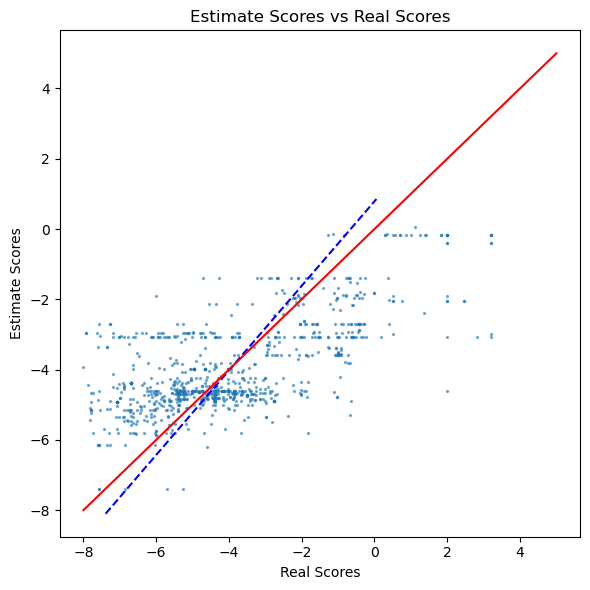

Average difference: 1.3162097189677033; Standard deviation: 1.0485995778826303; Number of outlets: 938; Total difference: 1234.6047163917058


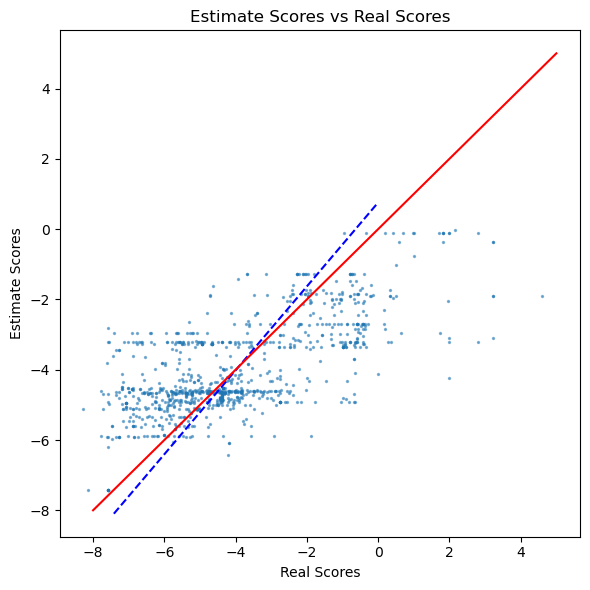

Average difference: 1.4146824397164186; Standard deviation: 1.108950570498179; Number of outlets: 946; Total difference: 1338.289587971732


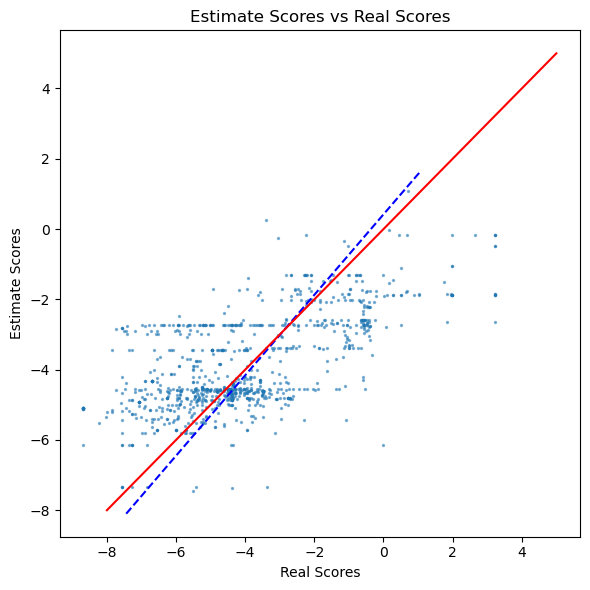

Average difference: 1.3568029602621037; Standard deviation: 1.0539045747192943; Number of outlets: 901; Total difference: 1222.4794671961554


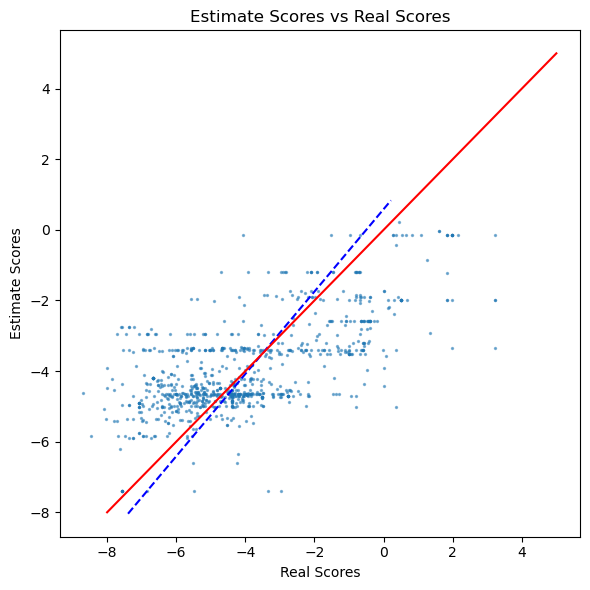

Average difference: 1.3187038965575575; Standard deviation: 1.0485641184246366; Number of outlets: 923; Total difference: 1217.1636965226255


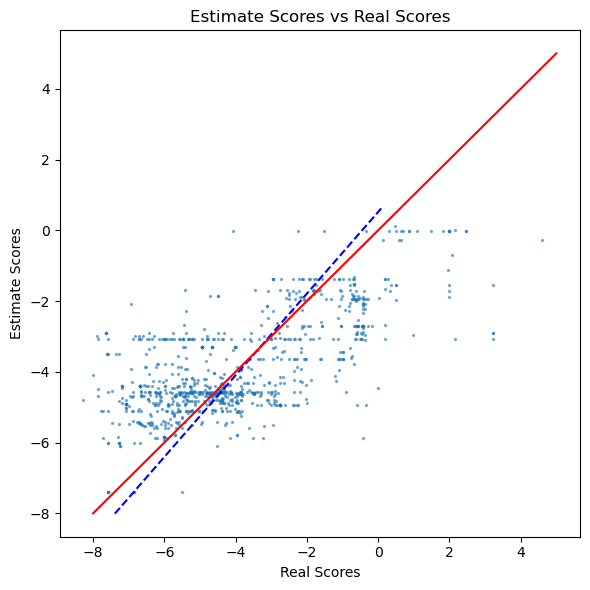

In [7]:
run_k_fold(matched_tages_with_score, column_to_train_on="google_categories", plot=True)
run_k_fold(matched_tages_with_score, column_to_train_on="google_tags", plot=True)